## 1: Introduction

Seasonal AutoRegressive Integrated Moving Average is a statistical model suited for time-series with both trend and seasonality.
- Extends SARIMA by modelling seasonal effects (how does it understand these? Do I need to encode them?)
- Requires the series to be stationary (constant mean and variance)
        -- What does this mean??
        -- Deep learning doesn't require this

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 

In [22]:
import pandas as pd

# Load your 15-minute electricity demand dataset
df = pd.read_csv('../data/processed/merged_dataset_cleaned.csv', sep = ';', index_col = "utc_timestamp", parse_dates = ["utc_timestamp"])

df.head()
# print dtypes for all columns

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,hour,is_daylight,month
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 07:15:00+00:00,2015-01-01T08:15:00+0100,40998.20,42497.11,37248,14.18,0.0004,27913,10433.26,0.3738,667,...,0.7855,27246,9909.30,0.3637,-1.046,88.773,519.464,8.0,1,1
2015-01-01 07:30:00+00:00,2015-01-01T08:30:00+0100,41120.90,42458.48,37248,49.02,0.0013,27913,10052.55,0.3601,667,...,0.7879,27246,9527.03,0.3497,-1.046,88.773,519.464,8.0,1,1
2015-01-01 07:45:00+00:00,2015-01-01T08:45:00+0100,41476.39,43085.68,37248,149.14,0.0040,27913,9962.65,0.3569,667,...,0.7906,27246,9435.32,0.3463,-1.046,88.773,519.464,8.0,1,1
2015-01-01 08:00:00+00:00,2015-01-01T09:00:00+0100,42120.40,44127.67,37248,340.85,0.0092,27913,9867.04,0.3535,667,...,0.7905,27246,9339.76,0.3428,-1.046,88.773,519.464,8.0,1,1
2015-01-01 08:15:00+00:00,2015-01-01T09:15:00+0100,42624.45,44906.50,37248,572.81,0.0154,27913,10067.22,0.3607,667,...,0.7907,27246,9539.84,0.3501,-1.046,88.773,519.464,8.0,1,1


## 2: Subsampling:
Strategy: one full year instead of random stratified sub-sampling to keep temporal structure in tact for SARIMA

In [23]:
# Subsample the data to only data in 2019
df = df.loc['2019-01-01':'2019-12-31']

In [24]:
print(df.dtypes)
print(df.head())
print(df.describe())

cet_cest_timestamp                       object
DE_load_actual_entsoe_transparency      float64
DE_load_forecast_entsoe_transparency    float64
DE_solar_capacity                         int64
DE_solar_generation_actual              float64
DE_solar_profile                        float64
DE_wind_capacity                          int64
DE_wind_generation_actual               float64
DE_wind_profile                         float64
DE_wind_offshore_capacity                 int64
DE_wind_offshore_generation_actual      float64
DE_wind_offshore_profile                float64
DE_wind_onshore_capacity                  int64
DE_wind_onshore_generation_actual       float64
DE_wind_onshore_profile                 float64
DE_temperature                          float64
DE_radiation_direct_horizontal           object
DE_radiation_diffuse_horizontal          object
hour                                    float64
is_daylight                               int64
month                                   

## 3: Train Test Split

In [25]:
n = len(df)
train_size = int(0.8 * n)
val_size = int(0.1 * n)

train = df.iloc[:train_size]
val = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

## 4: Preprocessing

- SARIMA needs features to be stationary
- Seasonality should be modelled explicitly

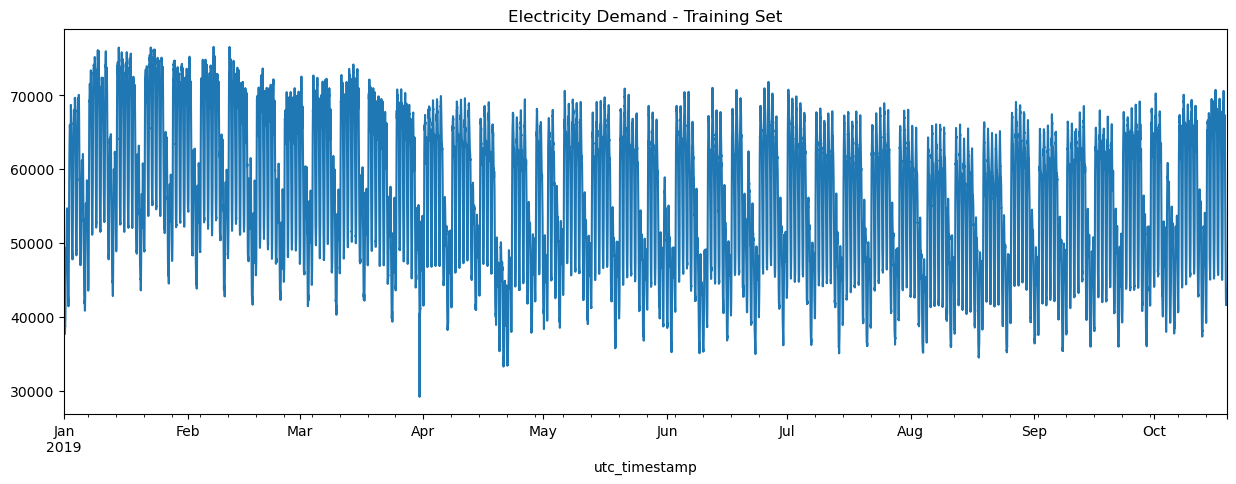

In [27]:
import matplotlib.pyplot as plt

train['DE_load_actual_entsoe_transparency'].plot(figsize=(15,5))
plt.title('Electricity Demand - Training Set')
plt.show()

In [ ]:
# Visualizing features and datatypes

print(df.dtypes)
print(df.describe())

cet_cest_timestamp                       object
DE_load_actual_entsoe_transparency      float64
DE_load_forecast_entsoe_transparency    float64
DE_solar_capacity                         int64
DE_solar_generation_actual              float64
DE_solar_profile                        float64
DE_wind_capacity                          int64
DE_wind_generation_actual               float64
DE_wind_profile                         float64
DE_wind_offshore_capacity                 int64
DE_wind_offshore_generation_actual      float64
DE_wind_offshore_profile                float64
DE_wind_onshore_capacity                  int64
DE_wind_onshore_generation_actual       float64
DE_wind_onshore_profile                 float64
DE_temperature                          float64
DE_radiation_direct_horizontal           object
DE_radiation_diffuse_horizontal          object
hour                                    float64
is_daylight                               int64
month                                   

In [ ]:
# Quick overview of non-numeric columns
print(df.select_dtypes(exclude=['number']).head())

utc_timestamp
2019-01-01 00:00:00+00:00    0.0
2019-01-01 00:15:00+00:00    0.0
2019-01-01 00:30:00+00:00    0.0
2019-01-01 00:45:00+00:00    0.0
2019-01-01 01:00:00+00:00    0.0
                            ... 
2019-12-30 21:30:00+00:00    0.0
2019-12-30 21:45:00+00:00    0.0
2019-12-30 22:00:00+00:00    0.0
2019-12-30 22:15:00+00:00    0.0
2019-12-30 22:30:00+00:00    0.0
Name: DE_radiation_direct_horizontal, Length: 34939, dtype: object


In [33]:
# Find first non-zero entries for the radiation columns
radiation_cols = ['DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']

for col in radiation_cols:
    # First 10 non-zero entries
    non_zero_entries = df[df[col] != '0.0'][col].head(10)
    print(f"First non-zero entries for {col}:\n{non_zero_entries}\n")


First non-zero entries for DE_radiation_direct_horizontal:
utc_timestamp
2019-01-01 07:00:00+00:00    0.0467
2019-01-01 07:15:00+00:00    0.0467
2019-01-01 07:30:00+00:00    0.0467
2019-01-01 07:45:00+00:00    0.0467
2019-01-01 08:00:00+00:00    0.4007
2019-01-01 08:15:00+00:00    0.4007
2019-01-01 08:30:00+00:00    0.4007
2019-01-01 08:45:00+00:00    0.4007
2019-01-01 09:00:00+00:00    12.182
2019-01-01 09:15:00+00:00    12.182
Name: DE_radiation_direct_horizontal, dtype: object

First non-zero entries for DE_radiation_diffuse_horizontal:
utc_timestamp
2019-01-01 07:00:00+00:00     31.339
2019-01-01 07:15:00+00:00     31.339
2019-01-01 07:30:00+00:00     31.339
2019-01-01 07:45:00+00:00     31.339
2019-01-01 08:00:00+00:00    215.878
2019-01-01 08:15:00+00:00    215.878
2019-01-01 08:30:00+00:00    215.878
2019-01-01 08:45:00+00:00    215.878
2019-01-01 09:00:00+00:00    481.563
2019-01-01 09:15:00+00:00    481.563
Name: DE_radiation_diffuse_horizontal, dtype: object



In [35]:
# Convert radiation columns to numeric
df['DE_radiation_direct_horizontal'] = pd.to_numeric(df['DE_radiation_direct_horizontal'], errors='coerce')
df['DE_radiation_diffuse_horizontal'] = pd.to_numeric(df['DE_radiation_diffuse_horizontal'], errors='coerce')
# Check for NaN values after conversion
print(df[['DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']].isna().sum())

DE_radiation_direct_horizontal     7096
DE_radiation_diffuse_horizontal    9360
dtype: int64


### Prepping

In [36]:
# 1. Force radiation columns to numeric (already done, but re-run safely)
df['DE_radiation_direct_horizontal'] = pd.to_numeric(df['DE_radiation_direct_horizontal'], errors='coerce')
df['DE_radiation_diffuse_horizontal'] = pd.to_numeric(df['DE_radiation_diffuse_horizontal'], errors='coerce')

# 2. Drop rows with any NaN in the selected features
selected_columns = [
    'DE_load_actual_entsoe_transparency',
    'DE_solar_capacity',
    'DE_solar_generation_actual',
    'DE_wind_capacity',
    'DE_wind_generation_actual',
    'DE_wind_offshore_capacity',
    'DE_wind_offshore_generation_actual',
    'DE_wind_onshore_capacity',
    'DE_wind_onshore_generation_actual',
    'DE_temperature',
    'DE_radiation_direct_horizontal',
    'DE_radiation_diffuse_horizontal',
    'hour',
    'is_daylight',
    'month'
]

df_sarima = df[selected_columns].dropna()

# 3. Rename columns for cleanliness
rename_dict = {
    'DE_load_actual_entsoe_transparency': 'load_actual',
    'DE_solar_capacity': 'solar_capacity',
    'DE_solar_generation_actual': 'solar_generation',
    'DE_wind_capacity': 'wind_capacity',
    'DE_wind_generation_actual': 'wind_generation',
    'DE_wind_offshore_capacity': 'wind_offshore_capacity',
    'DE_wind_offshore_generation_actual': 'wind_offshore_generation',
    'DE_wind_onshore_capacity': 'wind_onshore_capacity',
    'DE_wind_onshore_generation_actual': 'wind_onshore_generation',
    'DE_temperature': 'temperature',
    'DE_radiation_direct_horizontal': 'radiation_direct',
    'DE_radiation_diffuse_horizontal': 'radiation_diffuse',
    'hour': 'hour',
    'is_daylight': 'is_daylight',
    'month': 'month'
}

df_sarima.rename(columns=rename_dict, inplace=True)

# 4. Final check
print(df_sarima.info())

# 5. Save the clean file
df_sarima.to_csv('for_SARIMA.csv')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23492 entries, 2019-01-01 00:00:00+00:00 to 2019-12-30 22:45:00+00:00
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   load_actual               23492 non-null  float64
 1   solar_capacity            23492 non-null  int64  
 2   solar_generation          23492 non-null  float64
 3   wind_capacity             23492 non-null  int64  
 4   wind_generation           23492 non-null  float64
 5   wind_offshore_capacity    23492 non-null  int64  
 6   wind_offshore_generation  23492 non-null  float64
 7   wind_onshore_capacity     23492 non-null  int64  
 8   wind_onshore_generation   23492 non-null  float64
 9   temperature               23492 non-null  float64
 10  radiation_direct          23492 non-null  float64
 11  radiation_diffuse         23492 non-null  float64
 12  hour                      23492 non-null  float64
 13  is_daylight   

# Splitting and Prepping and Running

In [37]:
# 80-10-10 split
n = len(df_sarima)

train_size = int(0.8 * n)
val_size = int(0.1 * n)

train = df_sarima.iloc[:train_size]
val = df_sarima.iloc[train_size:train_size + val_size]
test = df_sarima.iloc[train_size + val_size:]

print(f"Train size: {len(train)}")
print(f"Validation size: {len(val)}")
print(f"Test size: {len(test)}")


Train size: 18793
Validation size: 2349
Test size: 2350


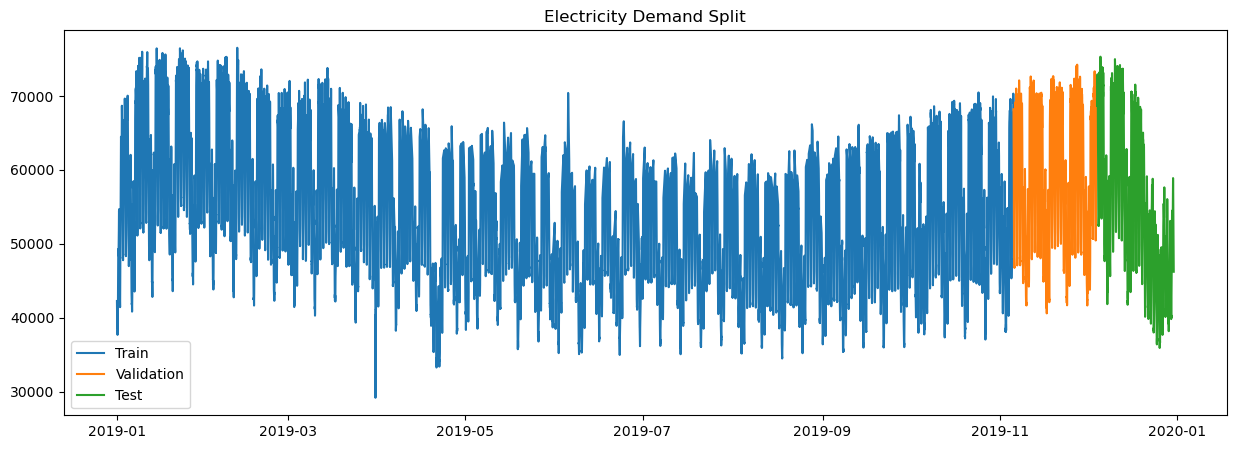

In [38]:
plt.figure(figsize=(15,5))
plt.plot(train.index, train['load_actual'], label='Train')
plt.plot(val.index, val['load_actual'], label='Validation')
plt.plot(test.index, test['load_actual'], label='Test')
plt.title('Electricity Demand Split')
plt.legend()
plt.show()


First SARIMA model - no exogenous features yet

In [ ]:
import statsmodels.api as sm

# Only use the target
y_train = train['load_actual']
y_val = val['load_actual']

# First SARIMA model setup
# (p,d,q) x (P,D,Q,s)
sarima_order = (2, 1, 2)
seasonal_order = (1, 1, 1, 96)

# Fit SARIMA
model = sm.tsa.statespace.SARIMAX(
    y_train,
    order=sarima_order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = model.fit(disp=False)

# Forecast into validation period
y_pred = sarima_result.predict(start=y_val.index[0], end=y_val.index[-1])

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(y_val.index, y_val, label='Actual')
plt.plot(y_val.index, y_pred, label='Predicted', linestyle='--')
plt.title('SARIMA Baseline Forecast on Validation Set')
plt.legend()
plt.show()


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
